In [ ]:
# 3.4 电影评论分类：二分类问题
from keras.datasets import imdb

# 参数保留数据中前10000个最常出现的单词。
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

In [ ]:
train_data[0]

In [ ]:
# 0代表负面，1代表正面
train_labels[0]

In [ ]:
max([max(sequence) for sequence in train_data])

In [ ]:
# 将某条评论解码为英文单词
word_index = imdb.get_word_index() # word_index是一个将单词映射为整数索引的字典
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)
print(decoded_review)

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences) , dimension)) # 创建一个形状为(len(sequences) , dimension)的零矩阵
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) # 将训练数据向量化
x_test = vectorize_sequences(test_data) # 将测试数据向量化

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# 将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_test)

[0. 1. 1. ... 0. 0. 0.]


In [19]:
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
# 编译模型
# 优化器，损失函数，指标
model.compile(
    optimizer='rmsprop', 
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [25]:
# 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
# 训练模型
# history是一个字典对象，包含训练过程中的所有数据
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20, # 20个轮次
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 304us/step - loss: 0.5147 - accuracy: 0.7805 - val_loss: 0.3918 - val_accuracy: 0.8690
Epoch 2/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.3101 - accuracy: 0.9009 - val_loss: 0.3076 - val_accuracy: 0.8853
Epoch 3/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.2235 - accuracy: 0.9277 - val_loss: 0.2999 - val_accuracy: 0.8806
Epoch 4/20
15000/15000 [==============================] - 3s 222us/step - loss: 0.1778 - accuracy: 0.9438 - val_loss: 0.2771 - val_accuracy: 0.8865
Epoch 5/20
15000/15000 [==============================] - 3s 221us/step - loss: 0.1435 - accuracy: 0.9553 - val_loss: 0.2854 - val_accuracy: 0.8871
Epoch 6/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.1198 - accuracy: 0.9631 - val_loss: 0.3072 - val_accuracy: 0.8802
Epoch 7/20
15000/15000 [==============================] - 3s 2

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

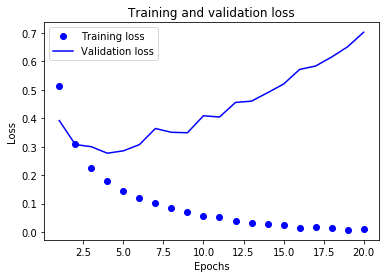

In [32]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt 

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1 )

plt.plot(epochs, loss_values, 'bo', label='Training loss') # bo表示蓝色圆点
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b'代表蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

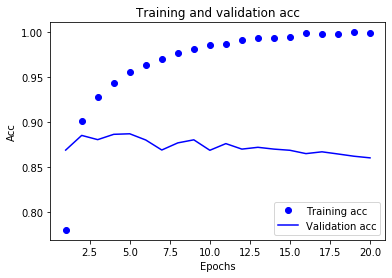

In [39]:
# 绘制训练精度和验证精度
plt.clf() # 清空图像
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()